In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = r"C:\Users\Alejandro\Downloads\Amazon_Products.xlsx"
df = pd.read_excel(data)

In [22]:
df1['Category'].value_counts()

Category
Electronics            521
Computers              448
Home                   442
OfficeProducts          31
HomeImprovement          2
MusicalInstruments       2
Toys                     1
Health                   1
Car                      1
Name: count, dtype: int64

In [76]:
df1 = df.copy()
df1['Discount'] = df1['discount_percentage'] * 100
df2 = df1.dropna()
df3 = df2[['Category', 'Product', 'discounted_price', 'actual_price', 'rating', 'Discount']]
df3.head(20)

,Category,Product,discounted_price,actual_price,rating,Discount
8,Electronics,AV Receivers,1.990,3.100,40.0,36.0
9,Electronics,Accessories,349.000,999.000,40.0,65.0
10,Electronics,Accessories,399.000,799.000,41.0,50.0
11,Electronics,Accessories,467.000,599.000,44.0,22.0
12,Electronics,Accessories,173.000,999.000,43.0,83.0
13,Electronics,Accessories,209.000,600.000,44.0,65.0
14,Electronics,Accessories,399.000,999.000,36.0,60.0
15,Electronics,Accessories,1.549,2.495,44.0,38.0
16,Electronics,Accessories,399.000,795.000,44.0,50.0
17,Electronics,Accessories,279.000,499.000,37.0,44.0


<Figure size 2000x1000 with 0 Axes>

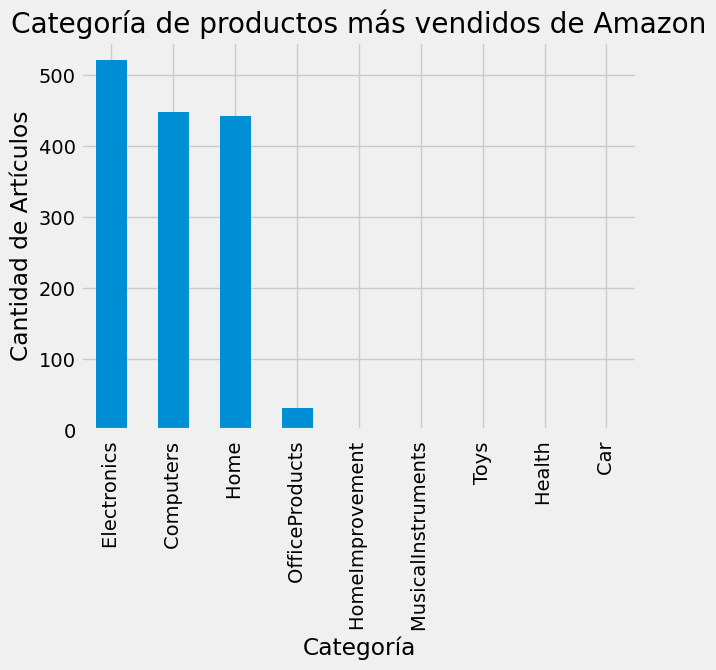

<Figure size 2000x1000 with 0 Axes>

In [72]:
df3['Category'].value_counts().plot(kind='bar', title='Categoría de productos más vendidos de Amazon', xlabel='Categoría',ylabel='Cantidad de Artículos')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

<Axes: xlabel='Category', ylabel='% promedio rebajado por categoría'>

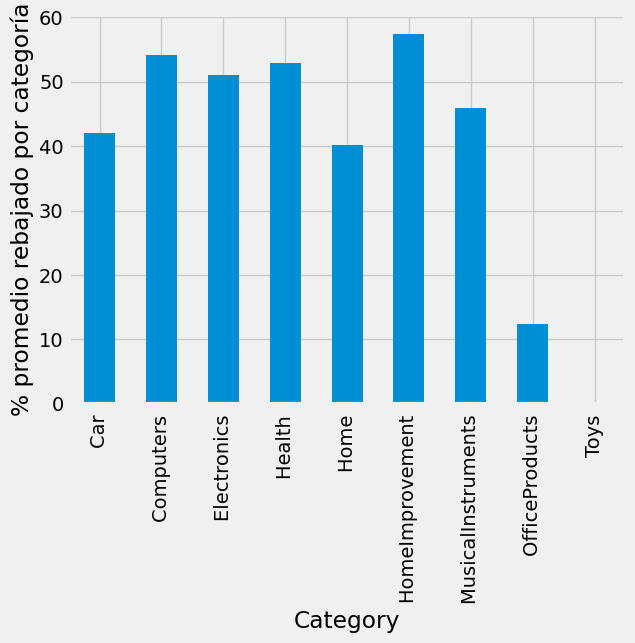

In [95]:
df3.groupby('Category')['Discount'].mean().plot(kind='bar', ylabel='% promedio rebajado por categoría')

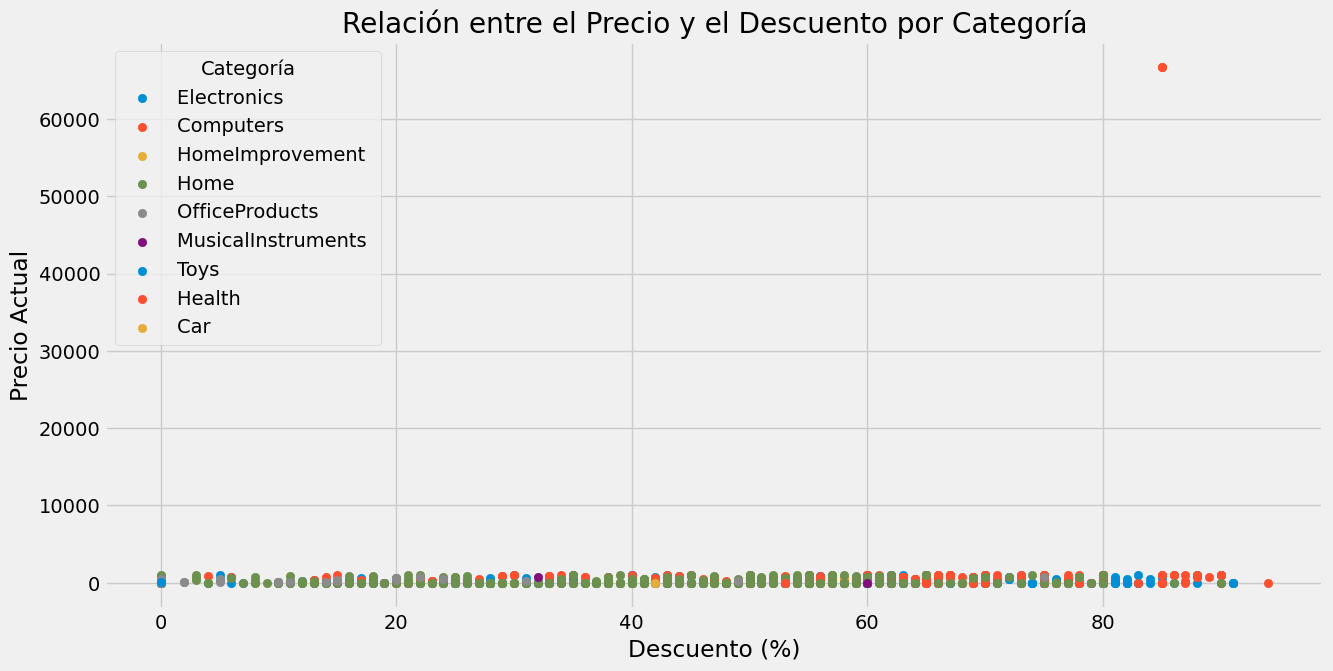

In [86]:
df3['Category'].value_counts()
plt.figure(figsize=(14, 7))
for category in df3['Category'].unique():
    subset = df3[df3['Category'] == category]
    plt.scatter(subset['Discount'], subset['actual_price'], label=category)
plt.title('Relación entre el Precio y el Descuento por Categoría')
plt.xlabel('Descuento (%)')
plt.ylabel('Precio Actual')
plt.legend(title='Categoría')
plt.show()

<Figure size 1400x700 with 0 Axes>

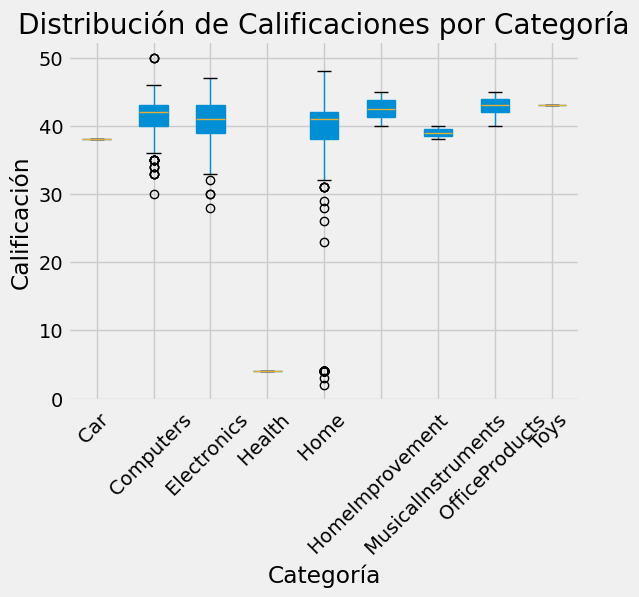

In [87]:
plt.figure(figsize=(14, 7))
df3.boxplot(column='rating', by='Category', patch_artist=True)
plt.title('Distribución de Calificaciones por Categoría')
plt.suptitle('')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.show()

In [88]:
best_rated = df3.loc[df3.groupby('Category')['rating'].idxmax()]
worst_rated = df3.loc[df3.groupby('Category')['rating'].idxmin()]

print("Productos mejor calificados por categoría:\n", best_rated[['Category', 'Product', 'rating']])
print("\nProductos peor calificados por categoría:\n", worst_rated[['Category', 'Product', 'rating']])

Productos mejor calificados por categoría:
                  Category                   Product  rating
500                  Car       Interior Accessories    38.0
224            Computers                     Cables    50.0
649          Electronics         Mobile Accessories    47.0
490               Health            Health Monitors     4.0
1018                Home   Small Kitchen Appliances    48.0
385      HomeImprovement            Cord Management    45.0
384   MusicalInstruments                  Condenser    40.0
363       OfficeProducts                Calculators    45.0
394                 Toys                    Drawing    43.0

Productos peor calificados por categoría:
                  Category               Product  rating
500                  Car   Interior Accessories    38.0
294            Computers                 Cables    30.0
1065         Electronics             SmartWatch    28.0
490               Health        Health Monitors     4.0
842                 Home        

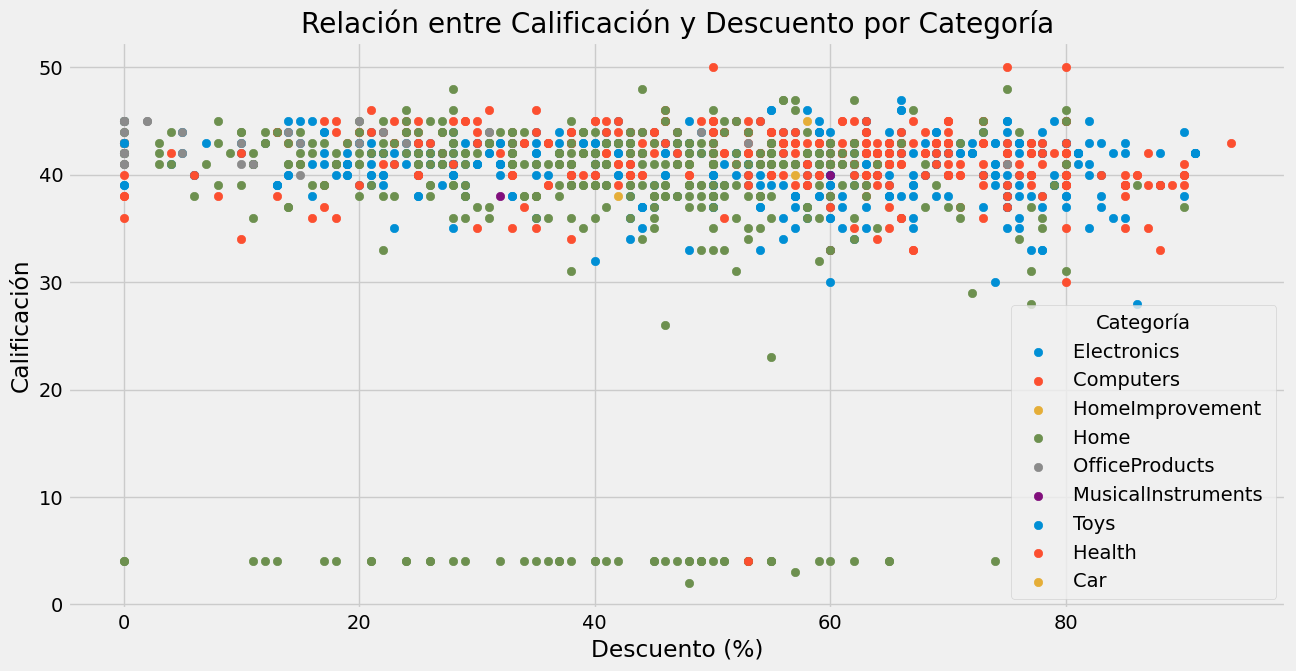

In [92]:
plt.figure(figsize=(14, 7))
for category in df3['Category'].unique():
    subset = df3[df3['Category'] == category]
    plt.scatter(subset['Discount'], subset['rating'], label=category)
plt.title('Relación entre Calificación y Descuento por Categoría')
plt.xlabel('Descuento (%)')
plt.ylabel('Calificación')
plt.legend(title='Categoría')
plt.show()

In [97]:
top_discounts = df3.loc[df3.groupby('Category')['Discount'].idxmax()].sort_values(by='Discount',ascending=True)
print("Productos con mayores descuentos por categoría:\n", top_discounts[['Category', 'Product', 'Discount']])

Productos con mayores descuentos por categoría:
                  Category                   Product  Discount
394                 Toys                    Drawing       0.0
500                  Car       Interior Accessories      42.0
490               Health            Health Monitors      53.0
385      HomeImprovement            Cord Management      58.0
384   MusicalInstruments                  Condenser      60.0
779       OfficeProducts                      Paper      75.0
940                 Home   Small Kitchen Appliances      90.0
1076         Electronics                 SmartWatch      91.0
109            Computers                   Adapters      94.0
